In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine,text
import urllib.parse

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
housing_data_df= pd.read_csv("F:/Python_WC/Luxury Housing Sales Analysis – Bengaluru/Luxury_Housing_Bangalore/Luxury_Housing_Bangalore.csv")


In [7]:
housing_data_df

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846039118798,Primary,NRI,31-03-2025,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,30-06-2024,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724412961911,Primary,HNI,31-12-2023,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,31-03-2024,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392444511946,Secondary,HNI,31-12-2024,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,PROP004730,BELLARY ROAD,Project_229,Embassy,8546.0,5Bhk+,11.33081004147843,Secondary,CXO,31-12-2024,8.552797,6.221131,Under construction,NRI Desk,no,7.511827,22,Will buy after possession.
100996,PROP059810,Bellary Road,Project_309,Brigade,3408.0,3bhk,10.829373158307602,Primary,CXO,30-09-2024,6.879269,9.783611,Ready to move,Direct,no,9.851849,26,Agent was not responsive.
100997,PROP065099,HENNUR ROAD,Project_98,RMZ,4691.0,4BHK,11.183303152058548,Primary,NRI,31-12-2023,6.753812,8.383013,Under construction,Broker,no,9.101604,44,Loved the amenities!
100998,PROP093022,rajajinagar,Project_21,Embassy,7435.0,3BHK,10.914156376035923,Secondary,Other,30-06-2024,4.437787,5.756247,Under construction,Broker,yes,8.588551,66,Excellent location!


In [8]:
housing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        90954 non-null   float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       90981 non-null   object 
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101000 non-null  object 
 15  

In [9]:
housing_data_df.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846039118798,Primary,NRI,31-03-2025,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,30-06-2024,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724412961911,Primary,HNI,31-12-2023,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,31-03-2024,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392444511946,Secondary,HNI,31-12-2024,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [10]:
housing_data_df.tail()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
100995,PROP004730,BELLARY ROAD,Project_229,Embassy,8546.0,5Bhk+,11.33081004147843,Secondary,CXO,31-12-2024,8.552797,6.221131,Under construction,NRI Desk,no,7.511827,22,Will buy after possession.
100996,PROP059810,Bellary Road,Project_309,Brigade,3408.0,3bhk,10.829373158307602,Primary,CXO,30-09-2024,6.879269,9.783611,Ready to move,Direct,no,9.851849,26,Agent was not responsive.
100997,PROP065099,HENNUR ROAD,Project_98,RMZ,4691.0,4BHK,11.183303152058548,Primary,NRI,31-12-2023,6.753812,8.383013,Under construction,Broker,no,9.101604,44,Loved the amenities!
100998,PROP093022,rajajinagar,Project_21,Embassy,7435.0,3BHK,10.914156376035923,Secondary,Other,30-06-2024,4.437787,5.756247,Under construction,Broker,yes,8.588551,66,Excellent location!
100999,PROP023826,whitefield,Project_325,L&T Realty,3218.0,4bhk,₹13.27 Cr,Primary,Startup Founder,31-12-2023,7.760416,9.989290,Under construction,Direct,yes,9.917647,58,Loved the amenities!


In [11]:
housing_data_df.columns

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments'],
      dtype='object')

In [12]:
housing_data_df.shape

(101000, 18)

In [13]:
housing_data_df["Unit_Size_Sqft"]=housing_data_df["Unit_Size_Sqft"].abs()

In [14]:
housing_data_df.describe()

,Unit_Size_Sqft,Connectivity_Score,Amenity_Score,Locality_Infra_Score,Avg_Traffic_Time_Min
count,90954.000000,101000.000000,90910.000000,101000.000000,101000.000000
mean,5972.285870,6.992619,7.503663,7.498426,67.182921
std,1783.360648,1.731757,1.440758,1.443128,30.271611
min,1.000000,4.000031,5.000224,5.000013,15.000000
25%,4477.250000,5.494526,6.260329,6.247954,41.000000
50%,5990.000000,6.985805,7.499123,7.495614,67.000000
75%,7497.000000,8.490000,8.752207,8.749824,93.000000
max,8999.000000,9.999970,9.999865,9.999956,119.000000


In [15]:
housing_data_df.isnull().sum().sort_values(ascending=False)

Buyer_Comments          18287
Amenity_Score           10090
Unit_Size_Sqft          10046
Ticket_Price_Cr         10019
Micro_Market                0
Property_ID                 0
Configuration               0
Transaction_Type            0
Developer_Name              0
Project_Name                0
Purchase_Quarter            0
Buyer_Type                  0
Possession_Status           0
Connectivity_Score          0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
dtype: int64

In [ ]:
# Check for duplicate rows
housing_data_df.duplicated().sum()
duplicates_all = housing_data_df[housing_data_df.duplicated(keep=False)]
print(duplicates_all)
#housing_data_df = housing_data_df.drop_duplicates()

       Property_ID   Micro_Market Project_Name     Developer_Name  \
50      PROP000051   Bellary Road   Project_50  Total Environment   
150     PROP000151    Rajajinagar  Project_150         L&T Realty   
156     PROP000157  Sarjapur Road  Project_156              Sobha   
232     PROP000233        Mg Road  Project_232            SNN Raj   
324     PROP000325      Jayanagar  Project_324              Sobha   
...            ...            ...          ...                ...   
100995  PROP004730   Bellary Road  Project_229            Embassy   
100996  PROP059810   Bellary Road  Project_309            Brigade   
100997  PROP065099    Hennur Road   Project_98                RMZ   
100998  PROP093022    Rajajinagar   Project_21            Embassy   
100999  PROP023826     Whitefield  Project_325         L&T Realty   

        Unit_Size_Sqft Configuration  Ticket_Price_Cr Transaction_Type  \
50              7385.0          4bhk            8.740          Primary   
150             8678.0 

Data Cleaning 

Filling Null Values

In [16]:
housing_data_df["Unit_Size_Sqft"].head(20)

0     4025.0
1     5760.0
2     7707.0
3     6192.0
4     7147.0
5     4290.0
6     6776.0
7     5763.0
8     5815.0
9     8675.0
10    8872.0
11    8765.0
12    4606.0
13    5157.0
14    6463.0
15    4814.0
16    3369.0
17       NaN
18       NaN
19    7324.0
Name: Unit_Size_Sqft, dtype: float64

In [17]:
housing_data_df["Unit_Size_Sqft"].tail(20)

100980    4019.0
100981    7823.0
100982    8105.0
100983    3363.0
100984    7215.0
100985    5879.0
100986    5087.0
100987    4775.0
100988    3483.0
100989    8526.0
100990    3906.0
100991    6483.0
100992       NaN
100993    5538.0
100994    6897.0
100995    8546.0
100996    3408.0
100997    4691.0
100998    7435.0
100999    3218.0
Name: Unit_Size_Sqft, dtype: float64

In [18]:
housing_data_df[housing_data_df["Unit_Size_Sqft"].isnull()]

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
17,PROP000018,YELAHANKA,Project_17,L&T Realty,NaN,4BHK,9.045289663266425,Secondary,CXO,31-03-2024,8.793448,5.186328,Ready to move,NRI Desk,yes,9.256085,77,Loved the amenities!
18,PROP000019,YELAHANKA,Project_18,Total Environment,NaN,5Bhk+,7.623657466155216,Primary,Other,31-12-2024,6.111031,6.898634,Ready to move,Broker,yes,8.652232,118,Connectivity is poor.
24,PROP000025,Mg Road,Project_24,L&T Realty,NaN,3Bhk,₹13.64 Cr,Primary,Other,31-03-2024,9.300782,9.464122,Under construction,Online,no,8.127972,43,Agent was not responsive.
33,PROP000034,jp nagar,Project_33,Tata Housing,NaN,5bhk+,15.018779938301385,Primary,CXO,30-09-2024,7.991544,5.489478,Ready to move,Direct,yes,6.337526,64,Great value for money.
45,PROP000046,Mg Road,Project_45,Brigade,NaN,5bhk+,15.671782533280059,Primary,NRI,31-12-2023,8.186105,9.515085,Launch,NRI Desk,yes,5.414198,57,Agent was not responsive.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100946,PROP068368,rajajinagar,Project_367,Sobha,NaN,5BHK+,10.025177509617947,Secondary,NRI,31-12-2023,8.567535,5.013950,Under construction,NRI Desk,yes,6.705184,15,Loved the amenities!
100953,PROP068005,Mg Road,Project_4,Total Environment,NaN,3BHK,6.719054770633415,Secondary,Startup Founder,31-12-2023,9.345955,8.484690,Under construction,Broker,no,9.250374,104,Loved the amenities!
100958,PROP057589,bellary road,Project_88,RMZ,NaN,5BHK+,10.426678125083635,Primary,NRI,31-12-2024,8.000070,8.857594,Under construction,NRI Desk,yes,9.588207,95,Too far from my office.
100966,PROP084077,Jayanagar,Project_76,Prestige,NaN,4Bhk,14.490628588482126,Primary,HNI,30-06-2023,7.193573,5.904934,Ready to move,Direct,no,5.996074,113,Great value for money.


In [19]:
housing_data_df["Unit_Size_Sqft"].fillna(housing_data_df["Unit_Size_Sqft"].mean(), inplace=True)

In [20]:
housing_data_df["Unit_Size_Sqft"].isnull().sum()

np.int64(0)

In [21]:
housing_data_df["Amenity_Score"] = housing_data_df["Amenity_Score"].fillna(housing_data_df["Amenity_Score"].mean())

In [22]:
housing_data_df.isnull().sum()

Property_ID                 0
Micro_Market                0
Project_Name                0
Developer_Name              0
Unit_Size_Sqft              0
Configuration               0
Ticket_Price_Cr         10019
Transaction_Type            0
Buyer_Type                  0
Purchase_Quarter            0
Connectivity_Score          0
Amenity_Score               0
Possession_Status           0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
Buyer_Comments          18287
dtype: int64

In [23]:
housing_data_df[housing_data_df["Buyer_Comments"].isnull()]

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,30-06-2024,4.839024,7.503663,Under construction,NRI Desk,no,7.723898,106,NaN
7,PROP000008,whitefield,Project_7,Total Environment,5763.0,3BHK,9.357538943683888,Secondary,NRI,31-03-2025,6.781306,9.565013,Under construction,Direct,yes,9.054713,31,NaN
8,PROP000009,sarjapur road,Project_8,Prestige,5815.0,3Bhk,12.299449409872416,Secondary,Other,31-03-2024,7.284164,5.580442,Under construction,NRI Desk,yes,8.552046,68,NaN
29,PROP000030,Mg Road,Project_29,SNN Raj,8436.0,5Bhk+,12.721005513628256,Primary,HNI,31-12-2024,8.351050,7.658513,Under construction,Broker,no,8.255983,34,NaN
30,PROP000031,WHITEFIELD,Project_30,L&T Realty,4460.0,5Bhk+,10.874274151418387,Primary,Other,30-06-2024,4.334881,8.150177,Ready to move,Online,yes,9.522717,68,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100954,PROP047570,BANNERGHATTA ROAD,Project_69,Puravankara,7768.0,4BHK,13.818039938826805,Secondary,Other,31-03-2025,5.234031,7.503663,Ready to move,Direct,no,8.670540,91,NaN
100957,PROP059496,Jayanagar,Project_495,L&T Realty,6394.0,3Bhk,10.211911834617192,Secondary,Startup Founder,31-03-2024,4.584414,5.720975,Launch,Broker,no,6.713494,106,NaN
100969,PROP042059,Electronic City,Project_58,Embassy,4283.0,4bhk,NaN,Secondary,HNI,31-12-2024,9.760059,7.056952,Under construction,NRI Desk,yes,9.391943,31,NaN
100973,PROP080315,Indiranagar,Project_314,RMZ,5597.0,4BHK,16.16286703425403,Secondary,Startup Founder,31-03-2025,4.381231,7.503663,Launch,Direct,yes,9.787469,25,NaN


In [24]:
housing_data_df["Buyer_Comments"] = housing_data_df["Buyer_Comments"].fillna(housing_data_df["Buyer_Comments"].mode()[0])

In [25]:
housing_data_df["Ticket_Price_Cr"] = housing_data_df["Ticket_Price_Cr"].fillna(housing_data_df["Ticket_Price_Cr"].mode()[0])

Clean inconsistent formats

In [26]:
housing_data_df["Ticket_Price_Cr"].head(50)

0     12.750846039118798
1     16.292151871065954
2     10.517724412961911
3      9.396367494232896
4     15.345392444511946
5               ₹9.82 Cr
6     10.896752354445224
7      9.357538943683888
8     12.299449409872416
9      9.193310278863123
10    15.221823819949362
11     7.384787238631023
12    11.042463301181789
13    15.166285271789972
14    13.851563178884089
15                    70
16     9.750864804838619
17     9.045289663266425
18     7.623657466155216
19     9.627966273140629
20    10.804414932112591
21              ₹8.68 Cr
22     7.901275335746435
23             ₹13.11 Cr
24             ₹13.64 Cr
25    11.600771718968296
26                   100
27    12.055118415680276
28     10.99341907034267
29    12.721005513628256
30    10.874274151418387
31    12.211532241862221
32     8.431399527981647
33    15.018779938301385
34    13.277257269897515
35     9.946344740156096
36    15.888427069115671
37    12.142110903981278
38             ₹14.11 Cr
39             ₹11.04 Cr


In [27]:
housing_data_df["Ticket_Price_Cr"].isnull().sum()

np.int64(0)

In [28]:
housing_data_df['Ticket_Price_Cr'].dtype

dtype('O')

In [29]:
# Step 1: Convert everything to string for uniform cleaning
housing_data_df['Ticket_Price_Cr'] = housing_data_df['Ticket_Price_Cr'].astype(str)

In [30]:
# Step 2: Remove unwanted symbols (₹, commas, 'Cr', etc.)
housing_data_df['Ticket_Price_Cr'] = (
    housing_data_df['Ticket_Price_Cr']
    .str.replace('₹', '', regex=False)
    .str.replace('Cr', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)

In [31]:
# Step 3: Convert to numeric (invalid strings become NaN)
housing_data_df['Ticket_Price_Cr'] = pd.to_numeric(housing_data_df['Ticket_Price_Cr'], errors='coerce')

In [32]:
housing_data_df["Ticket_Price_Cr"]=housing_data_df["Ticket_Price_Cr"].abs()

In [33]:
housing_data_df['Ticket_Price_Cr'].isnull().sum()

np.int64(0)

In [34]:
housing_data_df['Ticket_Price_Cr']=housing_data_df['Ticket_Price_Cr'].round(2)

In [35]:
housing_data_df['Ticket_Price_Cr'].head(10)


0    12.75
1    16.29
2    10.52
3     9.40
4    15.35
5     9.82
6    10.90
7     9.36
8    12.30
9     9.19
Name: Ticket_Price_Cr, dtype: float64

In [36]:
housing_data_df['Ticket_Price_Cr'].dtype

dtype('float64')

In [37]:
housing_data_df.isnull().sum()

Property_ID             0
Micro_Market            0
Project_Name            0
Developer_Name          0
Unit_Size_Sqft          0
Configuration           0
Ticket_Price_Cr         0
Transaction_Type        0
Buyer_Type              0
Purchase_Quarter        0
Connectivity_Score      0
Amenity_Score           0
Possession_Status       0
Sales_Channel           0
NRI_Buyer               0
Locality_Infra_Score    0
Avg_Traffic_Time_Min    0
Buyer_Comments          0
dtype: int64

In [38]:
housing_data_df["Micro_Market"].unique()

array(['Sarjapur Road', 'Indiranagar', 'Bannerghatta Road',
       'bellary road', 'Koramangala', 'YELAHANKA', 'whitefield',
       'sarjapur road', 'JP NAGAR', 'Rajajinagar', 'koramangala',
       'WHITEFIELD', 'indiranagar', 'jayanagar', 'Whitefield', 'DOMLUR',
       'yelahanka', 'Mg Road', 'HENNUR ROAD', 'Jayanagar', 'Domlur',
       'Electronic City', 'Hebbal', 'mg road', 'jp nagar',
       'BANNERGHATTA ROAD', 'MG ROAD', 'KANAKAPURA ROAD', 'HEBBAL',
       'BELLARY ROAD', 'electronic city', 'ELECTRONIC CITY',
       'Bellary Road', 'Hennur Road', 'rajajinagar', 'Kanakapura Road',
       'INDIRANAGAR', 'hennur road', 'kanakapura road', 'domlur',
       'bannerghatta road', 'RAJAJINAGAR', 'hebbal', 'Yelahanka',
       'SARJAPUR ROAD', 'KORAMANGALA', 'Jp Nagar', 'JAYANAGAR'],
      dtype=object)

In [39]:
housing_data_df["Micro_Market"].dtype

dtype('O')

In [40]:
# Normalize first: lowercase and strip spaces
housing_data_df['Micro_Market'] = housing_data_df['Micro_Market'].astype(str).str.strip().str.lower()

In [41]:
# Then title-case each word
housing_data_df['Micro_Market'] = housing_data_df['Micro_Market'].str.title()

In [42]:
# Normalize first: lowercase and strip spaces
housing_data_df['Configuration'] = housing_data_df['Configuration'].astype(str).str.strip().str.lower()

In [43]:
housing_data_df["Purchase_Quarter"].unique

<bound method Series.unique of 0         31-03-2025
1         30-06-2024
2         31-12-2023
3         31-03-2024
4         31-12-2024
             ...    
100995    31-12-2024
100996    30-09-2024
100997    31-12-2023
100998    30-06-2024
100999    31-12-2023
Name: Purchase_Quarter, Length: 101000, dtype: object>

In [44]:
housing_data_df['Purchase_Quarter'] = pd.to_datetime(housing_data_df['Purchase_Quarter'])

In [45]:
housing_data_df['Quarter_Number'] = housing_data_df['Purchase_Quarter'].dt.year.astype(str) +" "+'Q' + housing_data_df['Purchase_Quarter'].dt.quarter.astype(str)

In [46]:
housing_data_df['Quarter_Number']

0         2025 Q1
1         2024 Q2
2         2023 Q4
3         2024 Q1
4         2024 Q4
           ...   
100995    2024 Q4
100996    2024 Q3
100997    2023 Q4
100998    2024 Q2
100999    2023 Q4
Name: Quarter_Number, Length: 101000, dtype: object

In [47]:
housing_data_df["Quarter_Number"].unique

<bound method Series.unique of 0         2025 Q1
1         2024 Q2
2         2023 Q4
3         2024 Q1
4         2024 Q4
           ...   
100995    2024 Q4
100996    2024 Q3
100997    2023 Q4
100998    2024 Q2
100999    2023 Q4
Name: Quarter_Number, Length: 101000, dtype: object>

In [48]:
housing_data_df["Ticket_Price_Cr"].dtype

dtype('float64')

In [49]:
housing_data_df["Ticket_Price_Cr"].unique

<bound method Series.unique of 0         12.75
1         16.29
2         10.52
3          9.40
4         15.35
          ...  
100995    11.33
100996    10.83
100997    11.18
100998    10.91
100999    13.27
Name: Ticket_Price_Cr, Length: 101000, dtype: float64>

In [50]:
housing_data_df["Ticket_Price_Cr"]

0         12.75
1         16.29
2         10.52
3          9.40
4         15.35
          ...  
100995    11.33
100996    10.83
100997    11.18
100998    10.91
100999    13.27
Name: Ticket_Price_Cr, Length: 101000, dtype: float64

In [51]:
housing_data_df["Unit_Size_Sqft"].dtype

dtype('float64')

In [52]:
housing_data_df["Unit_Size_Sqft"].unique

<bound method Series.unique of 0         4025.0
1         5760.0
2         7707.0
3         6192.0
4         7147.0
           ...  
100995    8546.0
100996    3408.0
100997    4691.0
100998    7435.0
100999    3218.0
Name: Unit_Size_Sqft, Length: 101000, dtype: float64>

In [53]:
housing_data_df["Unit_Size_Sqft"]=housing_data_df["Unit_Size_Sqft"].round(2)

In [54]:
housing_data_df["Unit_Size_Sqft"].head(20)

0     4025.00
1     5760.00
2     7707.00
3     6192.00
4     7147.00
5     4290.00
6     6776.00
7     5763.00
8     5815.00
9     8675.00
10    8872.00
11    8765.00
12    4606.00
13    5157.00
14    6463.00
15    4814.00
16    3369.00
17    5972.29
18    5972.29
19    7324.00
Name: Unit_Size_Sqft, dtype: float64

In [55]:
housing_data_df["Price_per_Sqft"]=(housing_data_df["Ticket_Price_Cr"] * 1e7 / housing_data_df["Unit_Size_Sqft"])

In [56]:
housing_data_df["Price_per_Sqft"]=housing_data_df["Price_per_Sqft"].round(2)

In [57]:
housing_data_df["Possession_Status"].unique()

array(['Launch', 'Under construction', 'Ready to move'], dtype=object)

In [58]:
housing_data_df["Transaction_Type"].unique()

array(['Primary', 'Secondary'], dtype=object)

In [59]:
housing_data_df.columns

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments', 'Quarter_Number',
       'Price_per_Sqft'],
      dtype='object')

In [60]:
#Create Booking_flag
housing_data_df['Booking_Flag'] = housing_data_df['Possession_Status'].apply(
    lambda x: 1 if x == 'Launch' or x == 'Ready to move' else 0
)



In [61]:
# Create Booking_Status
housing_data_df['Booking_Status'] = housing_data_df['Booking_Flag'].apply(
    lambda x: 'Booked' if x == 1 else 'Not Booked'
)

In [62]:
housing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Property_ID           101000 non-null  object        
 1   Micro_Market          101000 non-null  object        
 2   Project_Name          101000 non-null  object        
 3   Developer_Name        101000 non-null  object        
 4   Unit_Size_Sqft        101000 non-null  float64       
 5   Configuration         101000 non-null  object        
 6   Ticket_Price_Cr       101000 non-null  float64       
 7   Transaction_Type      101000 non-null  object        
 8   Buyer_Type            101000 non-null  object        
 9   Purchase_Quarter      101000 non-null  datetime64[ns]
 10  Connectivity_Score    101000 non-null  float64       
 11  Amenity_Score         101000 non-null  float64       
 12  Possession_Status     101000 non-null  object        
 13 

In [63]:
housing_data_df.isnull().sum()

Property_ID             0
Micro_Market            0
Project_Name            0
Developer_Name          0
Unit_Size_Sqft          0
Configuration           0
Ticket_Price_Cr         0
Transaction_Type        0
Buyer_Type              0
Purchase_Quarter        0
Connectivity_Score      0
Amenity_Score           0
Possession_Status       0
Sales_Channel           0
NRI_Buyer               0
Locality_Infra_Score    0
Avg_Traffic_Time_Min    0
Buyer_Comments          0
Quarter_Number          0
Price_per_Sqft          0
Booking_Flag            0
Booking_Status          0
dtype: int64

## EDA

In [64]:
numeric_features = [feature for feature in housing_data_df.columns if housing_data_df[feature].dtype != 'O']
categorical_features = [feature for feature in housing_data_df.columns if housing_data_df[feature].dtype == 'O']

In [65]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Unit_Size_Sqft', 'Ticket_Price_Cr', 'Purchase_Quarter', 'Connectivity_Score', 'Amenity_Score', 'Locality_Infra_Score', 'Avg_Traffic_Time_Min', 'Price_per_Sqft', 'Booking_Flag']

We have 13 categorical features : ['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name', 'Configuration', 'Transaction_Type', 'Buyer_Type', 'Possession_Status', 'Sales_Channel', 'NRI_Buyer', 'Buyer_Comments', 'Quarter_Number', 'Booking_Status']


In [66]:
## Proportion of count data on categorical columns
for col in categorical_features:
    print(housing_data_df[col].value_counts(normalize=True)*100)
    print('---------------------------')

Property_ID
PROP022002    0.00198
PROP020372    0.00198
PROP031395    0.00198
PROP046534    0.00198
PROP043784    0.00198
               ...   
PROP099980    0.00099
PROP099981    0.00099
PROP099982    0.00099
PROP099983    0.00099
PROP099984    0.00099
Name: proportion, Length: 100000, dtype: float64
---------------------------
Micro_Market
Jp Nagar             6.377228
Sarjapur Road        6.371287
Bannerghatta Road    6.363366
Jayanagar            6.363366
Mg Road              6.284158
Whitefield           6.277228
Indiranagar          6.260396
Kanakapura Road      6.229703
Yelahanka            6.227723
Bellary Road         6.214851
Rajajinagar          6.211881
Electronic City      6.210891
Domlur               6.188119
Hebbal               6.173267
Hennur Road          6.154455
Koramangala          6.092079
Name: proportion, dtype: float64
---------------------------
Project_Name
Project_27     0.20495
Project_394    0.20495
Project_98     0.20495
Project_367    0.20495
Project_7 

In [67]:
# Proportion of count data on categorical columns
for col in numeric_features:
    print(housing_data_df[col].value_counts(normalize=True)*100)
    print('---------------------------')

Unit_Size_Sqft
5972.29    9.946535
1.00       0.500000
4058.00    0.032673
6868.00    0.031683
7617.00    0.030693
             ...   
6174.00    0.004950
7418.00    0.004950
6688.00    0.003960
7918.00    0.003960
4854.00    0.003960
Name: proportion, Length: 6002, dtype: float64
---------------------------
Ticket_Price_Cr
100.00    10.267327
70.00      0.331683
60.00      0.320792
12.63      0.145545
12.16      0.143564
            ...    
21.82      0.000990
3.20       0.000990
2.17       0.000990
23.06      0.000990
21.57      0.000990
Name: proportion, Length: 1944, dtype: float64
---------------------------
Purchase_Quarter
2024-03-31    12.623762
2024-09-30    12.557426
2023-06-30    12.529703
2023-09-30    12.493069
2024-06-30    12.483168
2024-12-31    12.470297
2023-12-31    12.435644
2025-03-31    12.406931
Name: proportion, dtype: float64
---------------------------
Connectivity_Score
5.625340    0.00198
4.373847    0.00198
4.589104    0.00198
5.261747    0.00198
4.571724  

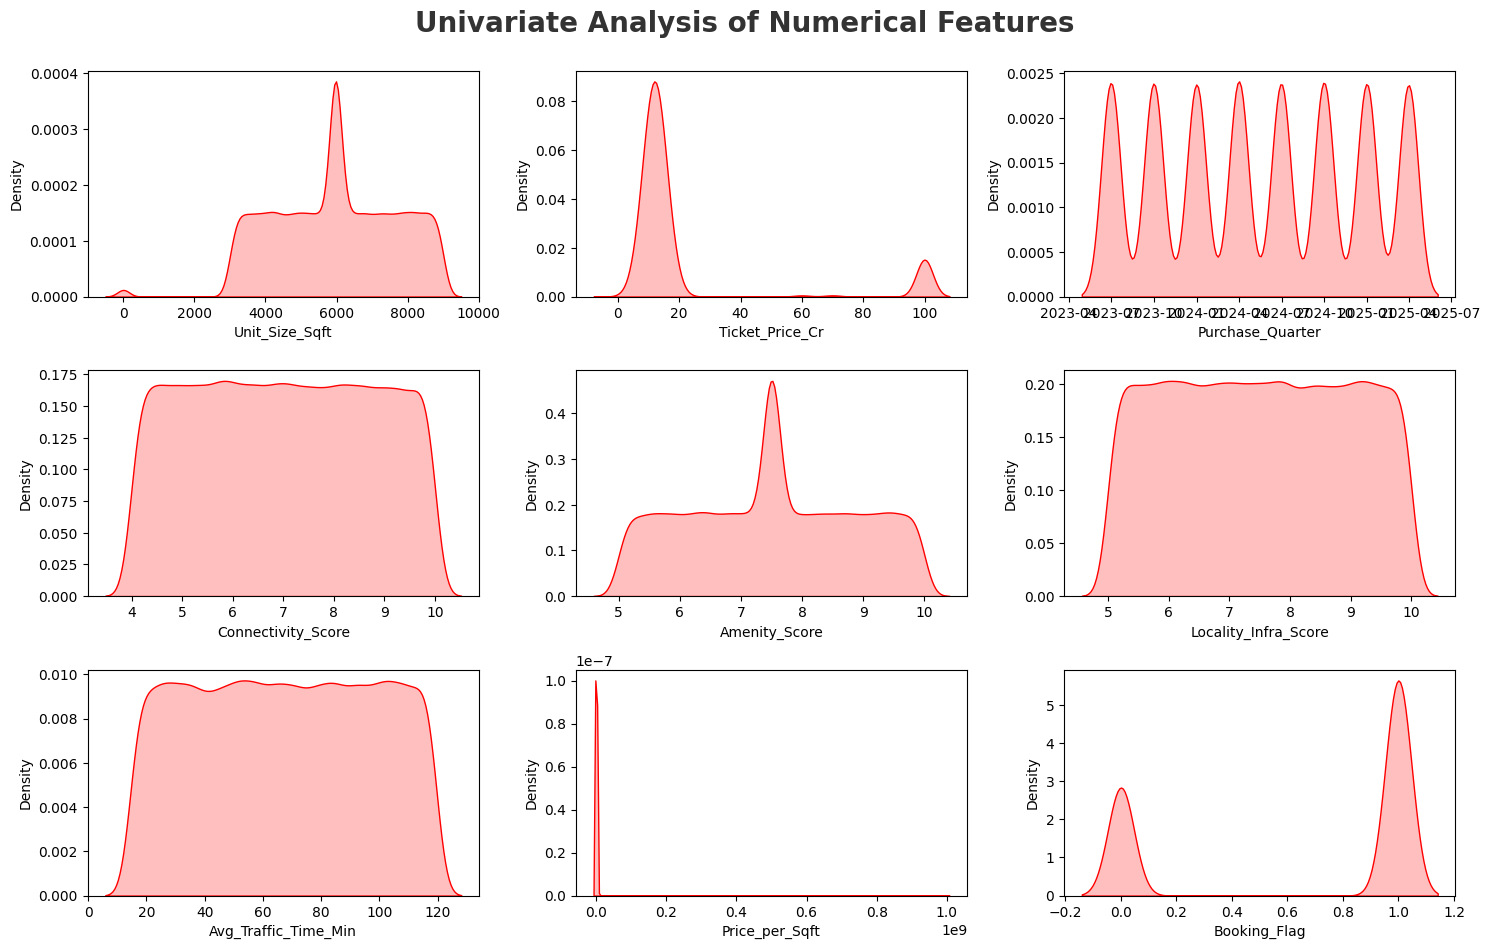

In [149]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=housing_data_df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Observations 

🏠 1. Unit_Size_Sqft

Distribution is roughly unimodal, centered around 6000 sqft.

Slight skew to the right (some very large units).

Few small outliers (possibly studio or 1BHK types).

💰 2. Ticket_Price_Cr

Strongly right-skewed distribution.

Most ticket prices are in the 0–20 crore range.

A small group of properties have prices exceeding 100 crore (possible luxury or outlier listings).

📅 3. Purchase_Quarter

Appears periodic, with peaks repeating across quarters.

Suggests seasonal purchase patterns or periodic spikes in demand (likely quarterly trends in property booking).

🚇 4. Connectivity_Score

Fairly uniform distribution between 4 and 10.

Indicates a balanced dataset — projects cover a wide range of connectivity ratings.

🏊 5. Amenity_Score

Peaked near 7–8, meaning most projects have moderate to good amenities.

Slight skew toward higher scores (likely new developments or premium properties).

🏙️ 6. Locality_Infra_Score

Almost uniform between 5–10, similar to connectivity.

Indicates balanced sampling — various locality qualities are represented.

🚗 7. Avg_Traffic_Time_Min

Fairly uniform between 10–120 minutes, meaning the dataset covers a variety of commute experiences.

No clear bias toward short or long travel times.

📏 8. Price_per_Sqft

Extremely right-skewed — heavy tail on the higher side.

Suggests a few luxury or overpriced properties driving the mean up.

Might require log transformation for better model performance.

📖 9. Booking_Flag

Binary distribution, with clear peaks at 0 and 1.

Indicates dataset has both booked and unbooked properties.

Proportionally, looks like more booked (1s) than unbooked (0s), meaning slightly imbalanced data.

🔍 Summary Insights

Several features (Ticket_Price_Cr, Price_per_Sqft) are heavily skewed — need normalization or transformation.

Others (Connectivity_Score, Locality_Infra_Score) are well distributed.

Booking_Flag imbalance should be handled in modeling (e.g., resampling).

Purchase_Quarter shows seasonal purchase trends, useful for time-based insights.

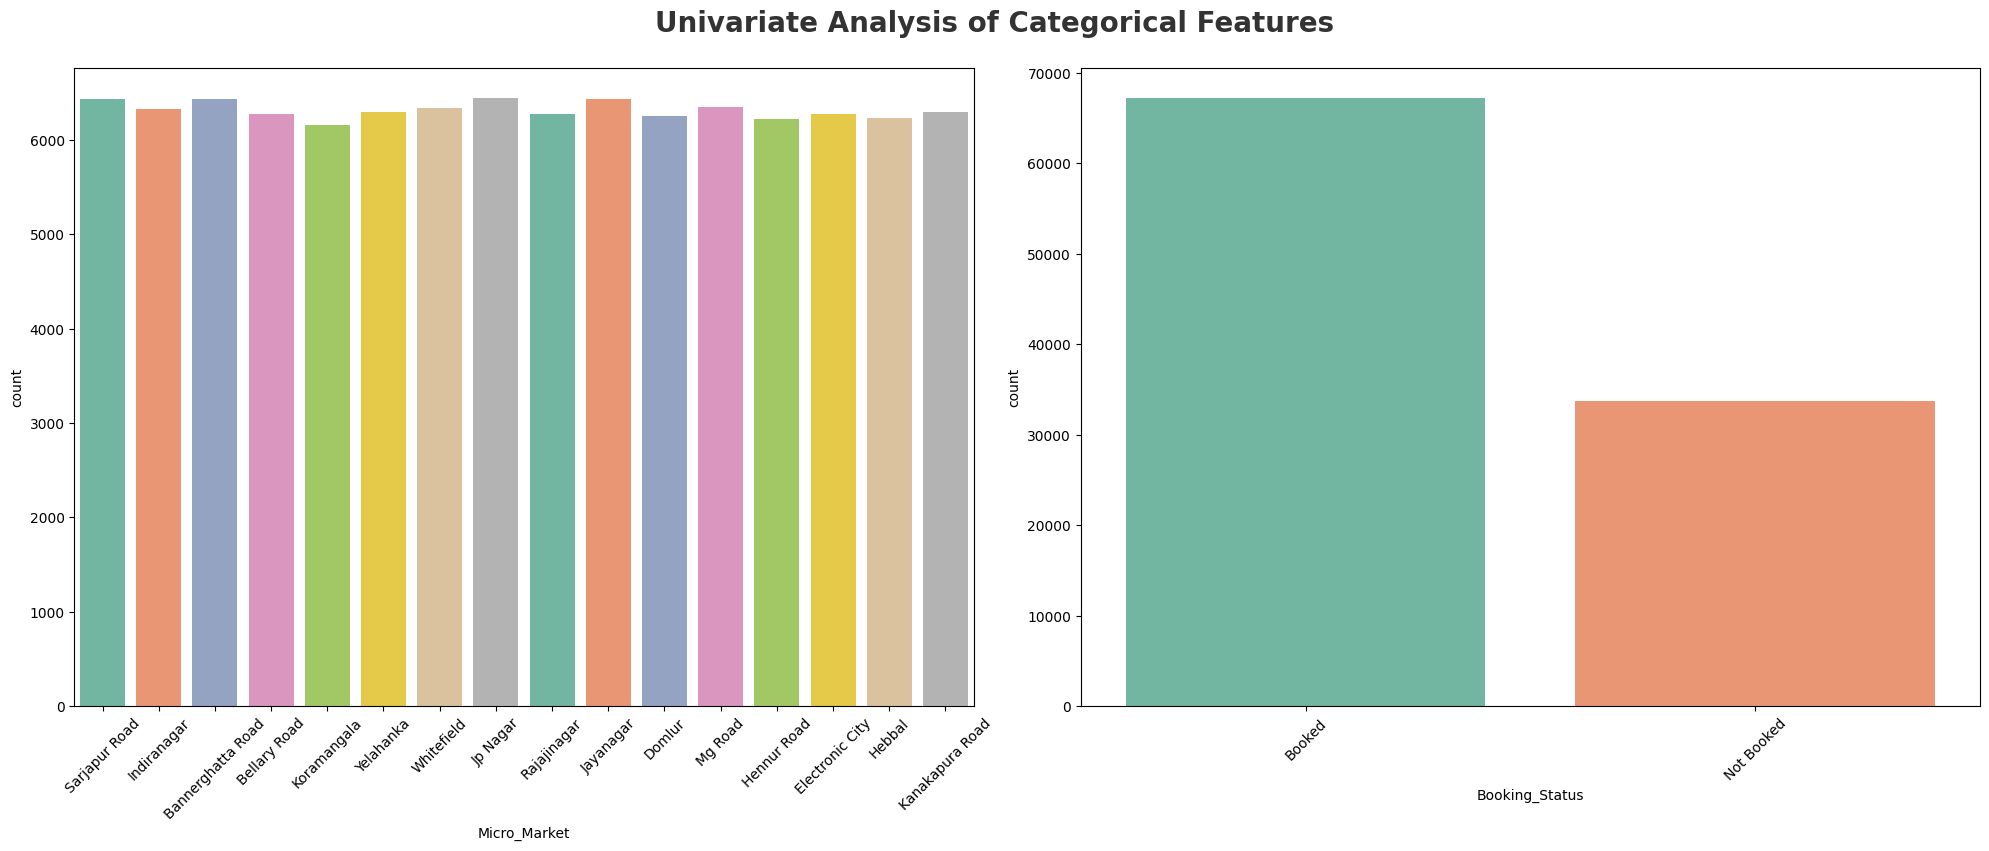

In [150]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Micro_Market', 'Booking_Status']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=housing_data_df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Univariate Analysis of Categorical Features

## Micro_Market

The distribution of listings across different micro-markets (e.g., Sarjapur Road, Indiranagar, Whitefield, Koramangala, etc.) is fairly uniform.

Each micro-market has roughly the same number of properties (~6,200–6,500 each), suggesting a balanced representation across all locations.

This indicates that the dataset does not suffer from location-based sampling bias and covers various regions evenly.

## Booking_Status

The ‘Booked’ category has a significantly higher count than ‘Not Booked’, with around two-thirds of the entries being booked.

This indicates a class imbalance in the target variable, which should be addressed during model training (e.g., via resampling or class weighting).

The higher proportion of booked properties could imply strong market demand or the dataset being more focused on successful transactions.

## Which is the most popular Configuration category?

<Axes: ylabel='count'>

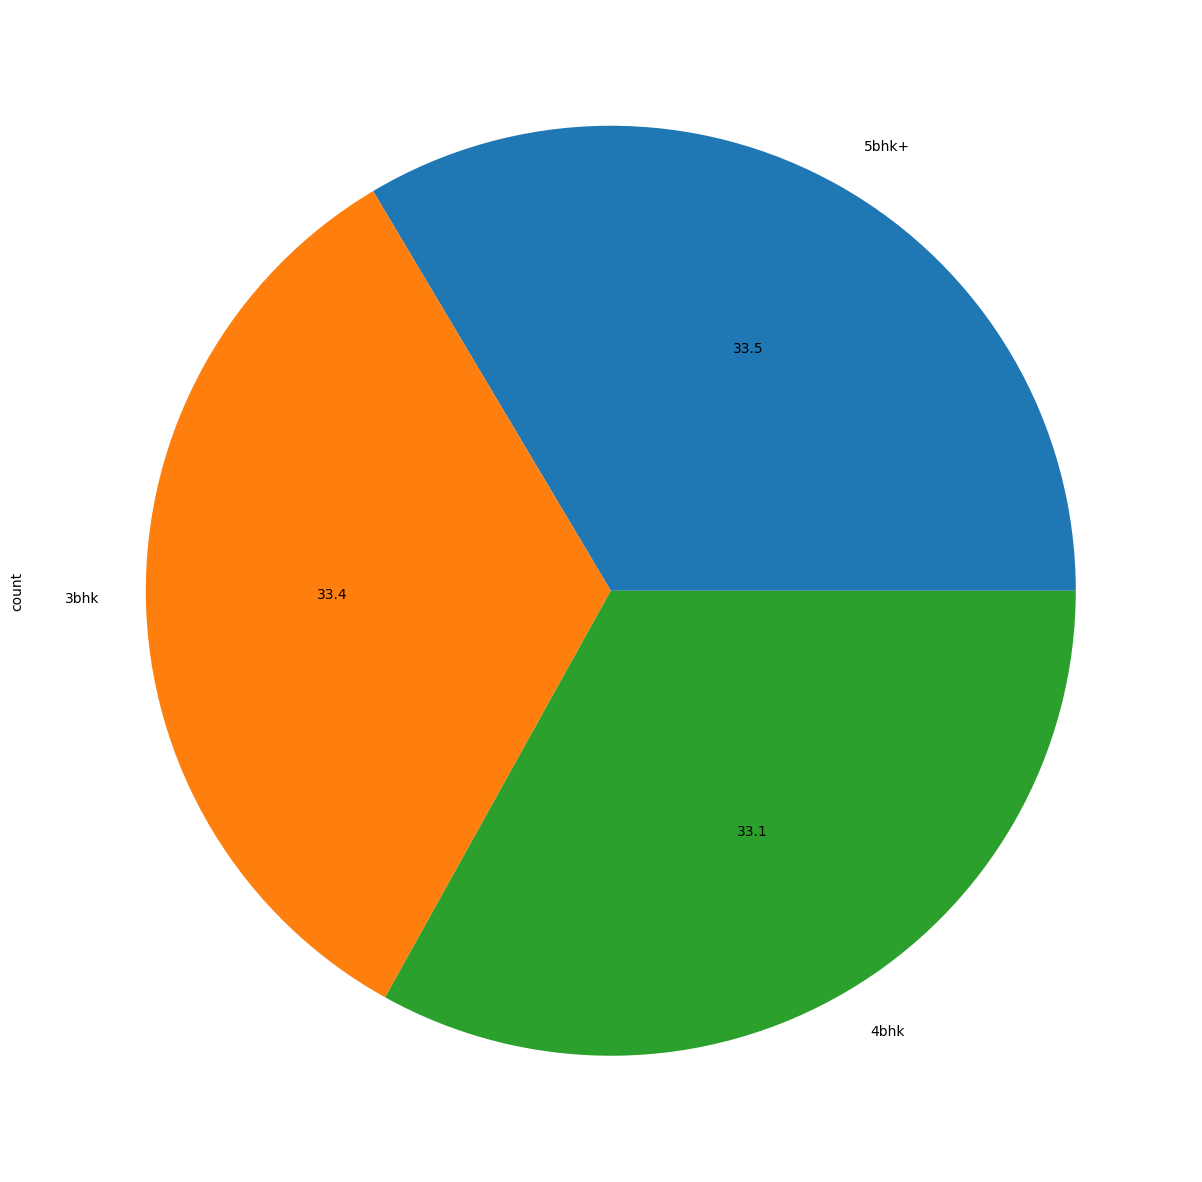

In [151]:
housing_data_df['Configuration'].value_counts().plot.pie(y=housing_data_df['Configuration'],figsize=(15,16),autopct='%1.1f')

## Observations

This pie chart shows the distribution of three different housing categories based on count:

3bhk: 33.4%

4bhk: 33.1%

5bhk+: 33.5%

Observations:

The distribution across the three categories is nearly equal, with each type making up approximately one-third of the total.

5bhk+ has a slightly higher percentage compared to the others, but the difference is minimal.

This could indicate that the dataset is evenly balanced in terms of housing types, or it may have been designed this way for comparison purposes.

In [71]:
#Detect outliers programmatically (IQR method)
def find_outliers(df):
    outliers_dict = {}
    outliers_count={}

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers_dict[col] = outliers.values
        outliers_count[col] = len(outliers)
    
    
    return outliers_dict,outliers_count

outliers,outliersCount= find_outliers(housing_data_df)
print("Outliers for each column:\n", outliers)
print("Outliers count for each column:\n", outliersCount)

Outliers for each column:
 {'Unit_Size_Sqft': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,

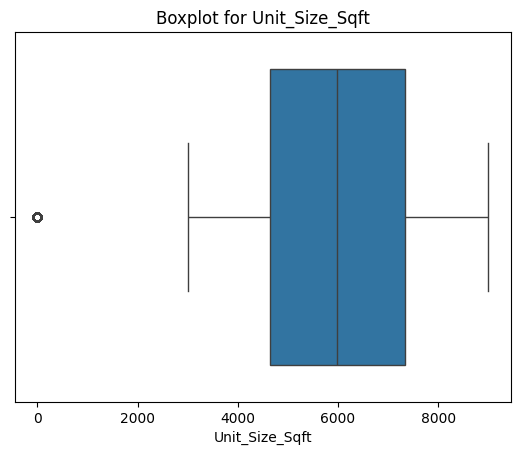

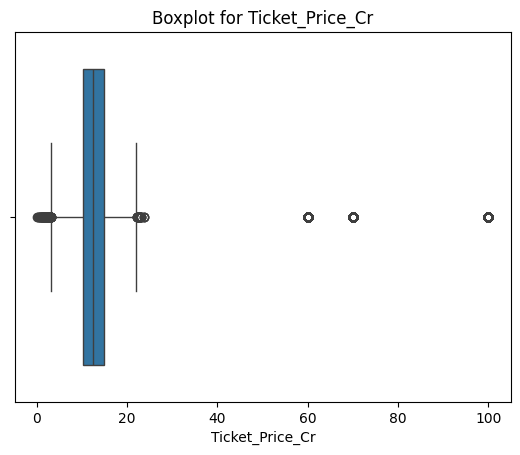

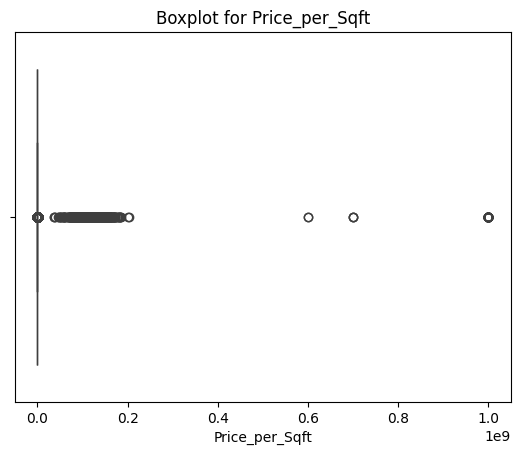

In [72]:


for col in ['Unit_Size_Sqft', 'Ticket_Price_Cr', 'Price_per_Sqft']:
    sns.boxplot(x=housing_data_df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

✅ Outliers after capping:
 ({'Unit_Size_Sqft': array([], dtype=float64), 'Ticket_Price_Cr': array([], dtype=float64), 'Connectivity_Score': array([], dtype=float64), 'Amenity_Score': array([], dtype=float64), 'Locality_Infra_Score': array([], dtype=float64), 'Avg_Traffic_Time_Min': array([], dtype=int64), 'Price_per_Sqft': array([], dtype=float64), 'Booking_Flag': array([], dtype=int64)}, {'Unit_Size_Sqft': 0, 'Ticket_Price_Cr': 0, 'Connectivity_Score': 0, 'Amenity_Score': 0, 'Locality_Infra_Score': 0, 'Avg_Traffic_Time_Min': 0, 'Price_per_Sqft': 0, 'Booking_Flag': 0})


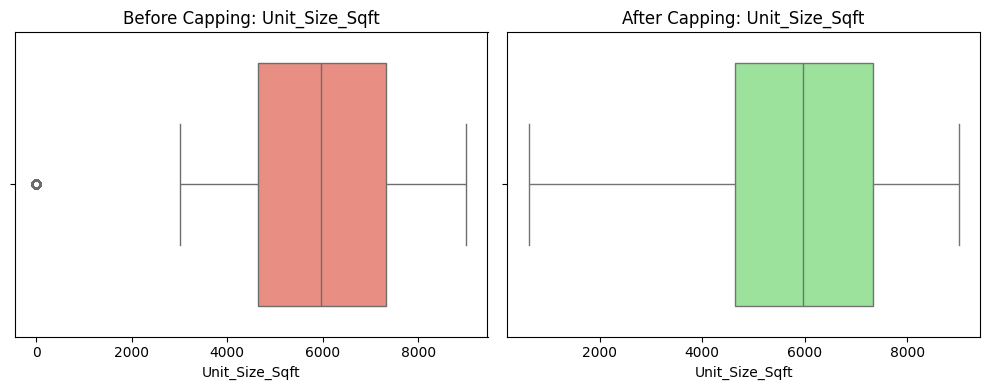

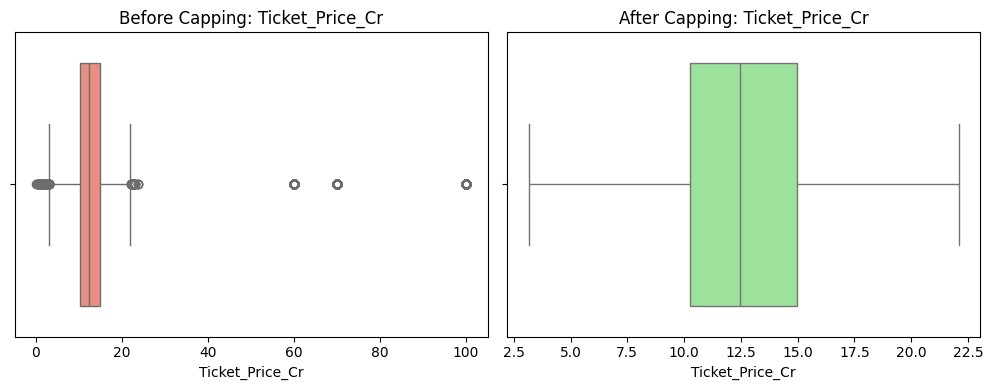

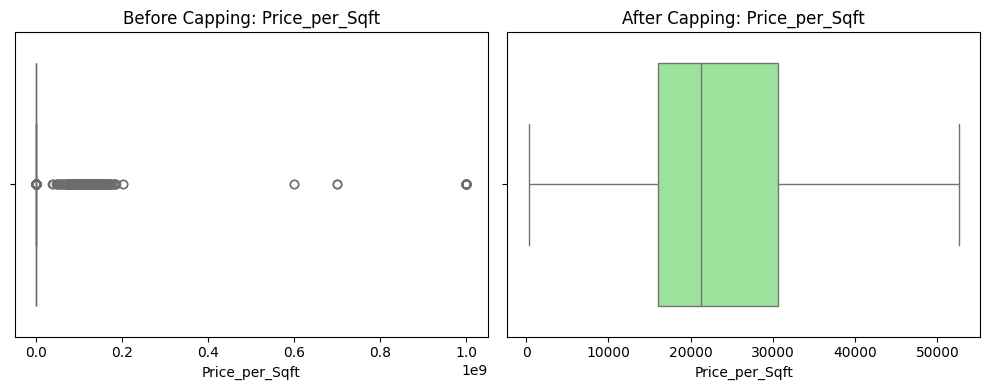

In [74]:
# Handling Outliers 

def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap values outside bounds
        df_capped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_capped


housing_data_df_clean =housing_data_df.copy()
cols = ['Unit_Size_Sqft', 'Ticket_Price_Cr', 'Price_per_Sqft']
housing_data_df_clean = cap_outliers_iqr(housing_data_df, cols)

#  Recalculate outliers (AFTER capping)
outliers_count_after = find_outliers(housing_data_df_clean)

print("✅ Outliers after capping:\n", outliers_count_after)


# Verify by Boxplot
for col in cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=housing_data_df[col], color='salmon')
    plt.title(f"Before Capping: {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=housing_data_df_clean[col], color='lightgreen')
    plt.title(f"After Capping: {col}")
    plt.tight_layout()
    plt.show()

In [75]:
#Assign only capped columns back to the original DataFrame
housing_data_df[cols] = housing_data_df_clean[cols]

print("Assigned only capped columns back to the original DataFrame")

Assigned only capped columns back to the original DataFrame


In [76]:
housing_data_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Unit_Size_Sqft,101000.0,5975.391281,622.0,4648.0,5972.29,7332.0,8999.0,1681.924931
Ticket_Price_Cr,101000.0,13.097129,3.165,10.26,12.46,14.99,22.085,4.220688
Purchase_Quarter,101000,2024-05-15 06:47:26.922772224,2023-06-30 00:00:00,2023-09-30 00:00:00,2024-03-31 00:00:00,2024-09-30 00:00:00,2025-03-31 00:00:00,NaN
Connectivity_Score,101000.0,6.992619,4.000031,5.494526,6.985805,8.49,9.99997,1.731757
Amenity_Score,101000.0,7.503663,5.000224,6.39511,7.503663,8.616106,9.999865,1.366898
Locality_Infra_Score,101000.0,7.498426,5.000013,6.247954,7.495614,8.749824,9.999956,1.443128
Avg_Traffic_Time_Min,101000.0,67.182921,15.0,41.0,67.0,93.0,119.0,30.271611
Price_per_Sqft,101000.0,25246.305093,327.19,16040.4125,21264.775,30649.19,52562.35625,12800.182133
Booking_Flag,101000.0,0.665653,0.0,0.0,1.0,1.0,1.0,0.471764


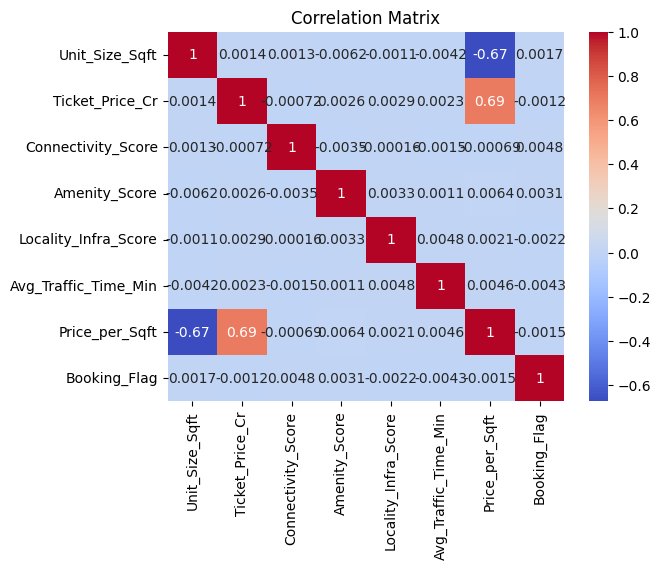

In [169]:
# Correlation matrix
corr_matrix = housing_data_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



## Correlation Matrix Observations

Strong Relationships

There is a strong positive correlation (0.69) between Ticket_Price_Cr and Price_per_Sqft, indicating that as ticket price increases, price per square foot also tends to increase — which is expected in real estate pricing.

There is a strong negative correlation (-0.67) between Unit_Size_Sqft and Price_per_Sqft, suggesting that larger units generally have a lower price per square foot, a common trend in real estate markets.

Weak or No Correlations

Most other features (e.g., Connectivity_Score, Amenity_Score, Locality_Infra_Score, Avg_Traffic_Time_Min) show very weak or negligible correlations with each other and with price variables.

This implies that these features are largely independent, reducing concerns of multicollinearity among predictors.

Booking_Flag Correlation

Booking_Flag shows no strong linear correlation with any numerical variable, meaning the likelihood of booking is not directly explained by any single numeric feature.

This suggests that nonlinear relationships or interactions may be influencing booking behavior — which can be better captured by tree-based or nonlinear models.

Summary Insight

Overall, the dataset shows limited multicollinearity, with the exception of the strong link between Ticket_Price_Cr and Price_per_Sqft, which should be considered during model building to avoid redundancy. The Booking_Flag being uncorrelated with other variables highlights the need for multivariate modeling or feature engineering to uncover deeper patterns.

## Load Clean Data into new cleaned CSV

In [77]:
housing_data_df.to_csv('F:/Python_WC/Luxury Housing Sales Analysis – Bengaluru/Luxury_Housing_Bangalore/Luxury_Housing_Bangalore_Cleaned.csv', index=False)

## Load Clean Data into MySql

In [79]:
# Database connection details
username = "root"          # your MySQL username
password = urllib.parse.quote_plus("Password@0274")  # encode special characters  # your MySQL password
host = "localhost"         # local system
port = 3306                # default MySQL port
database = "Luxury_Housing_Bangalore_DB"        # your database name

#Connect to MySQL *without specifying the database*
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}")

# Create the database if it doesn't exist
with engine.connect() as conn:
    conn.execute(text(f"CREATE DATABASE IF NOT EXISTS {database}"))
    print(f"✅ Database '{database}' created or already exists.")

# Now connect to that database
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")




✅ Database 'Luxury_Housing_Bangalore_DB' created or already exists.


In [80]:
# Insert DataFrame into MySQL 
housing_data_df.to_sql('luxury_properties', con=engine, if_exists='replace', index=False)    ## use 'replace' to overwrite or 'append' to add data

print("Table created and data inserted successfully!")


Table created and data inserted successfully!
